<h1>ENB9</h1><br>
<h2>1 layer, 360 neurons 50 epochs</h2><br>
I'm going to drastically increase the epochs, to see if more training improves consistency. I'm going to run 5 experiments of 50 epochs on the same network to see if the reults are more consistant.  I think with the small data set more training is required.

In [1]:
import numpy as np
import tensorflow as tf
import os
import csv
import matplotlib.pyplot as plt
from keras import models
from keras import layers
import pre_process as pp
import pickle
import time

C:\Users\Ryan\anaconda3\envs\tensorflow_env\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Ryan\anaconda3\envs\tensorflow_env\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Ryan\anaconda3\envs\tensorflow_env\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Ryan\anaconda3\envs\tensorflow_env\lib\s

<h2>Pre-processing</h2>

In [2]:
data, labels = pp.pre_process()

concatenating files
AReMv1\bending1\dataset1.csv
AReMv1\bending1\dataset2.csv
AReMv1\bending1\dataset3.csv
AReMv1\bending1\dataset4.csv
AReMv1\bending1\dataset5.csv
AReMv1\bending1\dataset6.csv
AReMv1\bending1\dataset7.csv
AReMv1\bending2\dataset1.csv
AReMv1\bending2\dataset2.csv
AReMv1\bending2\dataset3.csv
AReMv1\bending2\dataset5.csv
AReMv1\bending2\dataset6.csv
AReMv1\cycling\dataset1.csv
AReMv1\cycling\dataset10.csv
AReMv1\cycling\dataset11.csv
AReMv1\cycling\dataset12.csv
AReMv1\cycling\dataset13.csv
AReMv1\cycling\dataset14.csv
AReMv1\cycling\dataset15.csv
AReMv1\cycling\dataset2.csv
AReMv1\cycling\dataset3.csv
AReMv1\cycling\dataset4.csv
AReMv1\cycling\dataset5.csv
AReMv1\cycling\dataset6.csv
AReMv1\cycling\dataset7.csv
AReMv1\cycling\dataset8.csv
AReMv1\cycling\dataset9.csv
AReMv1\lying\dataset1.csv
AReMv1\lying\dataset10.csv
AReMv1\lying\dataset11.csv
AReMv1\lying\dataset12.csv
AReMv1\lying\dataset13.csv
AReMv1\lying\dataset14.csv
AReMv1\lying\dataset15.csv
AReMv1\lying\datas

In [135]:
#train_data, train_labels, val_data, val_labels, test_data, test_labels = pp.cluster_shuffle(data, labels)

SHUFFLING ARRAYS
act0 shape:  (7, 480, 6)
act1 shape:  (5, 480, 6)
act2 shape:  (15, 480, 6)
act3 shape:  (15, 480, 6)
act4 shape:  (15, 480, 6)
act5 shape:  (15, 480, 6)
act6 shape:  (15, 480, 6)
SLICING ARRAYS
(4, 480, 6)
(2, 480, 6)
(1, 480, 6)


<h2>Experiment 9</h2>
<br>
1 layer 360 neurons

In [44]:
net4 = models.Sequential()
net4.add(layers.Dense(480, input_shape = (480,6)))
net4.add(layers.Dense (360, activation = 'relu'))
net4.add(layers.Flatten())
net4.add(layers.Dense(7, activation = 'sigmoid'))
net4.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 480, 480)          3360      
_________________________________________________________________
dense_17 (Dense)             (None, 480, 360)          173160    
_________________________________________________________________
flatten_6 (Flatten)          (None, 172800)            0         
_________________________________________________________________
dense_18 (Dense)             (None, 7)                 1209607   
Total params: 1,386,127
Trainable params: 1,386,127
Non-trainable params: 0
_________________________________________________________________


In [35]:
def train_test4(test_no, train_data, train_labels, val_data, val_labels, test_data, test_labels):
    net4.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    hist4 = net4.fit(train_data, train_labels, epochs = 50, validation_data = (val_data, val_labels))
    test_results = net4.evaluate(test_data, test_labels)
    test_results.insert(0,'360')
    test_results.insert(1,test_no)
    test_no = test_no + 1
    summary = []
    summary.append(test_results)
    return test_no, summary, hist4

In [36]:
historys = []
summary = []
test_no = 1

In [45]:
i = 1
start = time.time()
while i < 2: 
    train_data, train_labels, val_data, val_labels, test_data, test_labels = pp.cluster_shuffle(data, labels)
    test_no, test_summary, hist = train_test4(test_no, train_data, train_labels, val_data, val_labels, test_data, test_labels)
    summary = summary + test_summary
    historys.append(hist)
    i = i + 1
end = time.time()
elapsed = end-start
print(elapsed)

SHUFFLING ARRAYS
act0 shape:  (7, 480, 6)
act1 shape:  (5, 480, 6)
act2 shape:  (15, 480, 6)
act3 shape:  (15, 480, 6)
act4 shape:  (15, 480, 6)
act5 shape:  (15, 480, 6)
act6 shape:  (15, 480, 6)
SLICING ARRAYS
(4, 480, 6)
(2, 480, 6)
(1, 480, 6)
Train on 52 samples, validate on 18 samples
Epoch 1/50
52/52 [==============================] - 1s 12ms/step - loss: 2.0094 - accuracy: 0.2115 - val_loss: 1.8017 - val_accuracy: 0.3333
Epoch 2/50
52/52 [==============================] - 0s 5ms/step - loss: 1.7546 - accuracy: 0.2885 - val_loss: 1.6596 - val_accuracy: 0.2778
Epoch 3/50
52/52 [==============================] - 0s 5ms/step - loss: 1.5528 - accuracy: 0.3077 - val_loss: 1.5821 - val_accuracy: 0.2222
Epoch 4/50
52/52 [==============================] - 0s 5ms/step - loss: 1.3078 - accuracy: 0.4038 - val_loss: 1.2978 - val_accuracy: 0.2778
Epoch 5/50
52/52 [==============================] - 0s 5ms/step - loss: 1.1115 - accuracy: 0.5385 - val_loss: 1.2446 - val_accuracy: 0.4444
Epoch 6

In [46]:
print(historys)

[<keras.callbacks.callbacks.History object at 0x000001F74BBB64E0>, <keras.callbacks.callbacks.History object at 0x000001F74E82FBE0>, <keras.callbacks.callbacks.History object at 0x000001F750061780>]


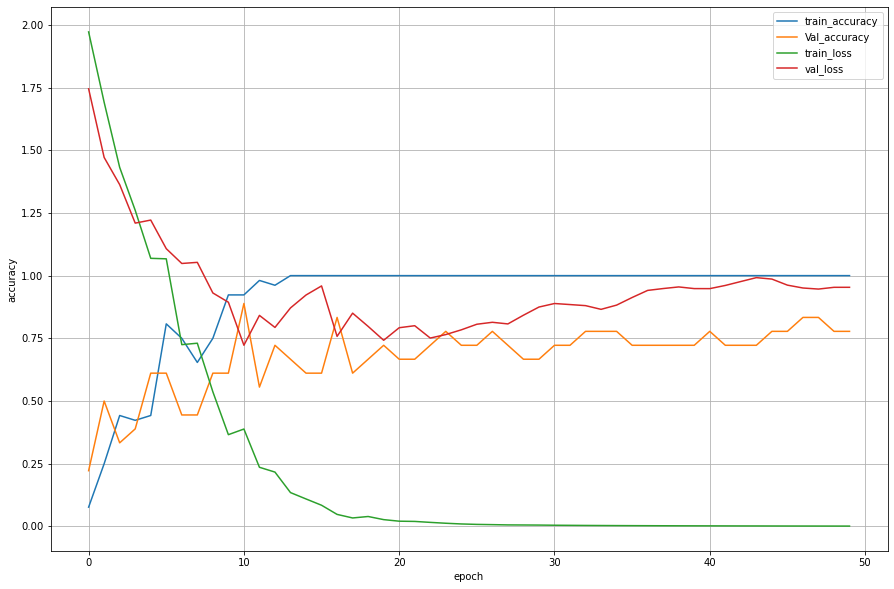

In [39]:
history1 = historys[0]
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy','Val_accuracy','train_loss', 'val_loss'], loc='upper right')
plt.rcParams['figure.figsize'] = [15, 10]
plt.grid()
plt.show()

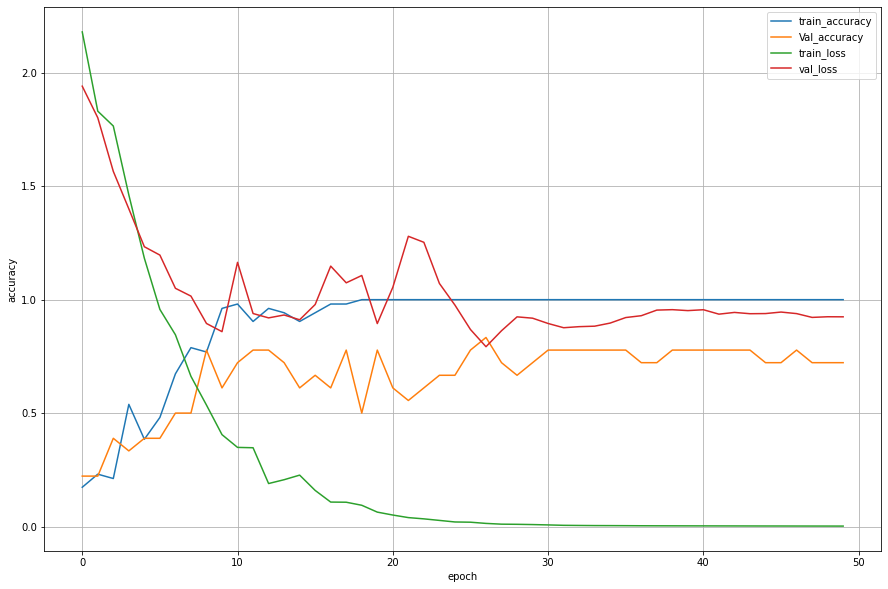

In [43]:
history2 = historys[1]
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy','Val_accuracy','train_loss', 'val_loss'], loc='upper right')
plt.rcParams['figure.figsize'] = [15, 10]
plt.grid()
plt.show()

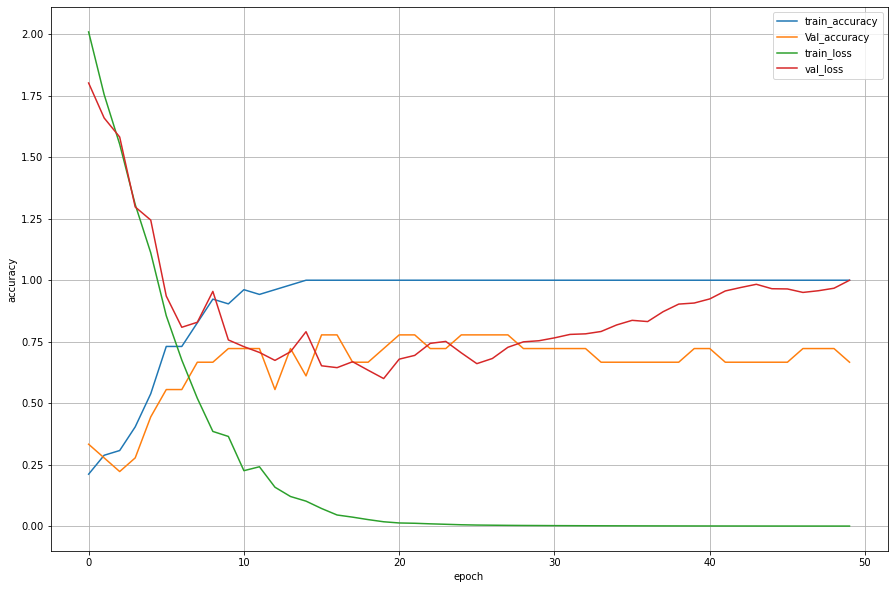

In [47]:
history3 = historys[2]
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy','Val_accuracy','train_loss', 'val_loss'], loc='upper right')
plt.rcParams['figure.figsize'] = [15, 10]
plt.grid()
plt.show()

Plot showing just the validation accuracy for each test run. the jumps and steps are very erratic. I think this is probably due to the size of the data set.  I'm going to look at:<br>
1: adjusting the learning rate<br>
2:removing the bending activities from the dataset
<br>3: using a different optimizer

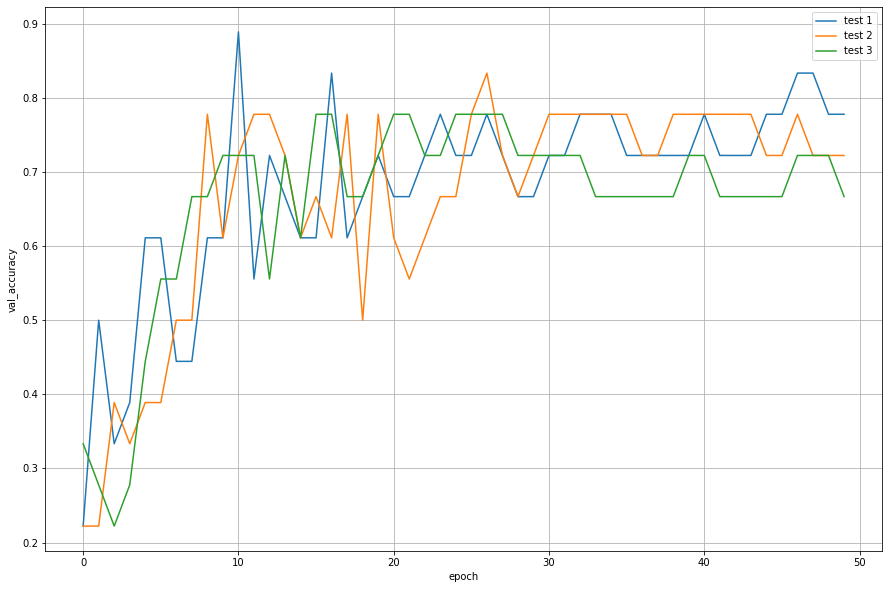

In [49]:
plt.plot(history1.history['val_accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.ylabel('val_accuracy')
plt.xlabel('epoch')
plt.legend(['test 1','test 2','test 3'], loc='upper right')
plt.rcParams['figure.figsize'] = [15, 10]
plt.grid()
plt.show()